# Chapter 3 Classification

There are two most common tasks in **supervised machine learning**: **regression** (predicting values) and **classification** (predicting classes). In this chapter, we focuse on building classification systems.

## Data Preparation

We will use the MNIST dataset of handwritten images as an example.

- Load MNIST dataset using sklearn.datasets.fetch_mldata() or from http://yann.lecun.com/exdb/mnist/ with python-mnist package.
- Construct training set and test set. We will use training set to build the classifier, and use test set to evaluate its performance.
- Explore the dataset (find size of dataset, show a random image, show multiple images

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Attempt with fetch_openml()
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', data_home='datasets')
# mnist

In [ ]:
# Attempt 1: get MNIST from mldata.org
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# mnist

In [ ]:
# Attempt 2: Load the downloaded image files
# 1. Download file from LeCun's website
# 2. Decompress the four files
# 3. install python package python-mnist
# !pip install python-mnist

In [ ]:
# from mnist import MNIST
# mndata = MNIST(r'C:\Users\ch002\Dropbox\Teaching\CMP464\Spring2019\Data\MNIST')
# train_images, train_labels = mndata.load_training()
# test_images, test_labels = mndata.load_testing()

In [ ]:
# train_images = np.array(train_images)
# train_images.shape

In [ ]:
# test_images = np.array(test_images)
# train_labels = np.array(train_labels)
# test_labels = np.array(test_labels)

In [ ]:
# mnist['DESCR']

In [ ]:
# images = mnist['data']
# labels = mnist['target']

In [3]:
# Load MNIST from the csv files
cur_path = os.getcwd()
datapath = cur_path + '/Data/MNIST_csv'
os.listdir(datapath)

['mnist_test.csv', 'mnist_train.csv']

In [4]:
# Load the csv files
os.chdir(datapath)
train_df = pd.read_csv('mnist_train.csv', sep=',')
train_df.shape

(59999, 785)

label: 7


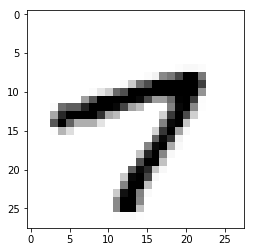

In [9]:
# split the first column and the rest
train_labels = train_df.iloc[:, 0]
train_labels
train_images = train_df.iloc[:, 1:]

# convert the data structure from data frame to numpy array
train_labels = np.array(train_labels)
train_images = np.array(train_images)

# Show the first image
img = train_images[100].reshape(28, 28)
print("label:", train_labels[100])
plt.imshow(img, cmap=matplotlib.cm.binary)

In [10]:
os.listdir()

['mnist_test.csv', 'mnist_train.csv']

In [11]:
test_image= pd.read_csv('mnist_test.csv',sep=',')

In [13]:
test_image.shape

test_image= np.array(test_image)

In [14]:
test_labels = test_image[:,0]
test_labels[:10]

array([2, 1, 0, 4, 1, 4, 9, 5, 9, 0], dtype=int64)

2


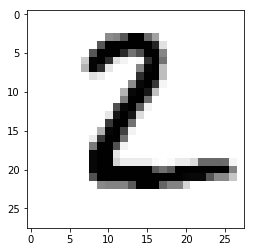

In [16]:
test_images = test_image[:,1:]

print (test_labels[0])

img = test_images[0].reshape(28,28)
plt.imshow(img, cmap=matplotlib.cm.binary)

In [ ]:
# 1:5 -> [1,2,3,4]
# 2:6 -> [2,3,4,5]
# :10 -> [0,1,2,3,4,5,6,7,8,9]
# 3: -> [3, 4, ...., ends at the last index]

##### Build a Binary Clasifier

To start, we aim at building a binary classifier to identify if an handwritten digit is five.

- Create the labels for binary classification (1 for five, and 0 for all other digits)
- Apply the **k-nearest-neighbor algorithm** using sklearn.neighbors.KNeighborsClassifier.
- Use its fit() method to train the model, use predict method to make predictions on given images.

In [ ]:
# type(labels)

In [ ]:
# Create an array labels_5 to store the truth value of the label being 5.
# labels_5 = (labels == 5)

In [ ]:
# df_labels = pd.DataFrame(labels, columns=['Label'])
# df_labels['Label'].value_counts()

In [ ]:
# df_labels_5 = pd.DataFrame(labels_5, columns=['Label'])
# df_labels_5['Label'].value_counts()

In [ ]:
# the original labels are sorted
# labels[:100]

## Split the dataset into training set and test set

We must reserve a portion of the data to test the model. The training set is used to train the model, and usually cannot be used to evaluate the model.

In [ ]:
# split the dataset into training set and test set.
# usually we take about 15% as test data
# from sklearn.model_selection import train_test_split
# train_images, test_images, train_labels_5, test_labels_5 = \
#     train_test_split(images, labels_5, test_size = 0.15)

In [18]:
# Since the training set and test set are already split, we no long need 
# train_test_split. However, we need to do shuffling
new_indices = np.random.permutation(range(len(train_images)))
train_images = train_images[new_indices]
train_labels = train_labels[new_indices]

Next, we apply KNeighborsClassifier to build a binary classifier.

In [ ]:
# VERY SLOW
# Apply KNN model to build the binary classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_images, train_labels_5)

In [ ]:
# VERY SLOW 
# Use the model to make predictions on the test set
predictions_knn = knn.predict(test_images)

In [19]:
# Create a binary labels for '5' or 'not 5'
train_labels_5 = [(label == 5) for label in train_labels]
test_labels_5 = [(label == 5) for label in test_labels]

# Use SGDClassifier 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_images, train_labels_5)

C:\Users\ch002\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [21]:
predictions = sgd.predict(test_images)
predictions[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

## K-Nearest Neighbor (KNN) Method

- Used to classify new data points based on "distance" to known data
- Find the K nearest neighbors, based on your distance metric
- Let them all vote on the classification

## Evaluate Performance of a Classifier

- Use sklearn.metrics.accuracy_score to calculate classification accuracy on the training set and on the test set.
- Display the images where the model predicts wrong.
- Use cross-validation to evaluate the performance of the model on various training and test sets.
- Use confusion matrix to show the percentage of **false positives** and **true negatives**.

In [23]:
# Calculate the test accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_labels_5, predictions)
print('test_accuracy:', test_accuracy)

# training accuracy is not a good measure of performance
train_predictions = sgd.predict(train_images)
train_accuracy = accuracy_score(train_labels_5, train_predictions)
print('train_accuracy:', train_accuracy)

test_accuracy: 0.9600960096009601
train_accuracy: 0.9569659494324906


#### Cross Validation
- partition the dataset into k mutully-exclusive subsets
- perform training on all but the 1st set, test the performance on the 1st set.
- perform training on all but the 2nd set, test the performance on the 2nd set.
- perform training on all but the 3rd set, test the performance on the 3rd set.
- ....
- perform training on all but the last set, test the performance on the last set.

In this way, the model is tested on k different training sets. If all performances are acceptable, we should have high confidence on the model.

In [24]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(sgd, train_images, train_labels_5, cv=5,
                                 scoring='accuracy')

C:\Users\ch002\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\ch002\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\ch002\Anaconda3\lib\sit

In [25]:
print(accuracy_scores)

[0.95216667 0.95975    0.96641667 0.965      0.95791316]


### Confusion Matrix
For each pair of class A and B:
- count the number of instances of class A being classified as B
- count the number of instances of class B being classified as A

The numbers will form an $n\times n$ matrix, where $n$ is the number of classes.

In [26]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_labels_5, predictions)
print(conf_mat)

[[9087   20]
 [ 379  513]]


**For binary classifiers**:
confusion matrx = [[TN, FP], [FN, TP]]

- TN: true negative
- FP: false positive
- FN: false negative
- TP: true positive

**Precision** = TP / (TP + FP)

- What does precision represent?
- Can a bad model have high precision?


**Recall** = TP / (TP + FN)
- What does recall represent?
- Can a bad model have high recall?

$F_1$ **score**

$F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_labels_5, predictions)
recall = recall_score(test_labels_5, predictions)
f1 = f1_score(test_labels_5, predictions)
f1_formula = 2 / (1 / precision + 1 / recall)
print(precision, recall, f1, f1_formula)

0.9624765478424016 0.5751121076233184 0.7200000000000002 0.72


## More Performance Measures

- Precision-Recall tradeoff
- Distribution of scores
- ROC (Receiver operation characteristic) curve: True positive rate vs. Negative positive rate
- AUC (Area under curve)

In [31]:
from sklearn.metrics import roc_curve
test_scores = sgd.decision_function(test_images)
tpr, npr, thresholds = roc_curve(test_labels_5, test_scores)

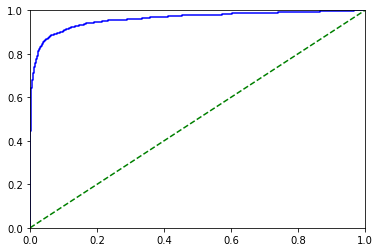

In [34]:
# plot tpr vs. npr.
plt.plot(tpr, npr, 'b-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'g--')

In [36]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(test_labels_5, test_scores)
print("AUC score:", score)

AUC score: 0.9609629856499288


# Multiclass Classification

- Some models can directly handle multiple classes (Random forest, naive Bayes, neural networks)
- One vs. All: build a binary classifier for each class, compare their prediction scores
- One vs. One: build a binary classifier for each pair of classes, and see which class wins most duels

**Q: How to evaluate a multiclass classifier?**

Further topics:

- multilabel classification
- multioutput classification

In [37]:
sgd2 = SGDClassifier()
sgd2.fit(train_images, train_labels)

C:\Users\ch002\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [38]:
predictions2 = sgd2.predict(test_images)

In [39]:
accuracy = accuracy_score(test_labels, predictions2)
mat = confusion_matrix(test_labels, predictions2)
print(accuracy)

0.8790879087908791


In [40]:
print(mat)

[[ 915    0   15    9    0   10   20    4    5    2]
 [   0 1112    2    6    0    0    2    1   11    1]
 [   3   12  901   56    5    5    9   14   18    9]
 [   1    1   16  947    1   20    0   11    4    9]
 [   4    6    7    8  871    1    7   21   17   40]
 [   6    3    3  100   13  716   10    9   26    6]
 [   5    2   13    8    6   23  888    4    9    0]
 [   0    9   23    9    4    1    1  954    2   24]
 [   8   25   29  114   18   61    3   32  668   16]
 [   5   13    7   22   49   13    0   75    7  818]]


## Homework

1. Training machine learning models on MNIST data with augmentation:
    - Use scipy.ndimage.interpolation.shift() function to shift each image in the MNIST training dataset in the following ways: 1) 1 pixel up; 2) 1 pixel down; 3) 1 pixel to the left; 4) 1 pixel to the right.
    - Use SGDClassifier to build a binary classifier on the augmented dataset that identifies if the image is **9**.
    - Evaluate the performance of the classifier by showing: 1) test accuracy; 2) confusion matrix; 

2. (extra credits) Chapter 3 Exercise 4: Build a spam classifer.